# コーディングセッション

## 目的：Kaggleを使ってデータサイエンティストのいろはを学ぼう！

# データサイエンティストのいろはとは？

1. データハンドリング（I/O、前処理・整形、正規化）
2. 初期分析と仮説構築（集計、可視化、仮説構築）
2. 機械学習（教師あり学習、教師なし学習）
3. 結果の評価（ROC解析、クロスバリデーション）

参考資料：
[イントロダクション by シバタアキラさん (p.21)](http://www.slideshare.net/hijiki_s/20150307-py-datatutorial)

# Kaggleって何？

- [ビッグデータを世界の天才たちが紐解くKaggle](http://kazuyonakatani.com/big_data_kaggle/)
- [現在開催中のkaggleコンペ & 過去のコンペ](https://www.kaggle.com/)

# 今回はこれ！

## タイタニックの生存者予測
- [Titanic: Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic)

## ゴール
- タイタニックの乗客のデータ（名前、年齢、性別、社会階級など）を用いて、生存者かどうかを推定。
- train.csv（891人）の中にパターンを見つけて、test.csv（418人）に含まれる乗客が生存者かどうかを推定。

# Kaggleやってみたいけど、どうすりゃいいの？

・まずはKaggleのウェブサイトからデータをゲット（無料のユーザー登録をする必要あり）

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/media/getthedata.PNG)

# まずはデータを眺めてみよう


- 目的：データの中にパターンを見つけ、予測につながる仮説を立てる
- ツール：pandas

In [1]:
import pandas as pd

In [2]:
# データの読み込み
df_train = pd.read_csv("./data/train.csv", header=0) # トレーニングデータ
df_test = pd.read_csv("./data/test.csv", header=0) # テストデータ

In [3]:
type(df_train)

pandas.core.frame.DataFrame

In [4]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [6]:
df_train.shape

(891, 12)

# 変数

## 独立変数（説明変数）

- PassengerId: 乗客ID
- Pclass: 客室の等級（1st, 2nd , 3rd）
- Name: 名前
- Sex: 性別
- Age: 年齢
- SibSp: 共に乗船していた兄弟（siblings）や 配偶者（spouses）の数
- Parch: 共に乗船していた親（parents）や子供（children）の数
- Ticket: チケットのタイプ
- Fare: チケットの料金
- Cabin: 客室番号
- Embarked: 乗船港（**Q**ueenstown, **C**herbourg, **S**outhampton）

## 従属変数（目的変数）
- Survived：生存者かどうか（1: 助かった、0：助からなかった）

In [7]:
# テストデータには従属変数が含まれない
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
# 総データ数
df_train.shape[0] + df_test.shape[0]

1309

In [9]:
# データ欠損やデータの型を見るにはデータフレームの.info()メソッドを使う
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


トレーニングデータだけを見ると、Age, Cabin, Embarkedに欠損値が含まれている模様

In [10]:
# データの型だけを見たいときはデータフレームの.dtypesというデータ属性を見る。
# 機械学習で使いたいデータは、事前に数値データに変換しておく必要あり。
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# データの集計（数値データに対してのみ各種統計量を計算）
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


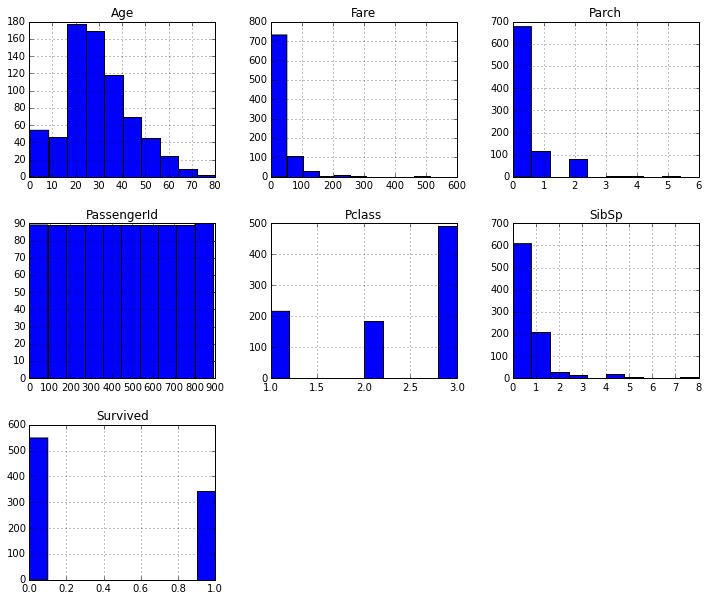

In [14]:
df_train.hist(figsize=(12, 10));

あれ、図がでないぞ...

In [13]:
# Jupyter（IPython Notebook）内で図を描画するためのマジックコマンド
%matplotlib inline

# モデル１: 性別だけで予測してみよう

- 直感や仮説をモデルに落とすべし！
- 映画「Titanic」では女性と子供をはじめに助けていたなぁ。

In [15]:
pt = df_train.pivot_table(values='PassengerId', 
                          index='Sex', 
                          columns='Survived', 
                          aggfunc=lambda x: len(x))
pt

Survived,0,1
Sex,,
female,81,233
male,468,109


In [16]:
pt2 = pt.apply(lambda x: x/sum(x), axis=1)
pt2

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


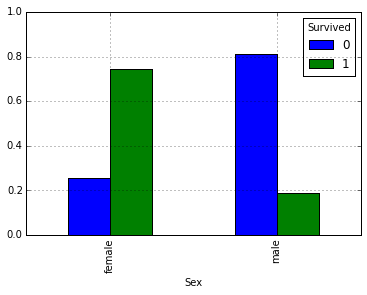

In [17]:
pt2.plot(kind="bar", ylim=(0, 1))

「ふむふむ、やはり女性の方が男性よりも生存率が高そうだ。」

In [18]:
# テストデータの出番
df_test.shape

(418, 11)

In [19]:
# モデルを用いてテストデータの目的変数を予測する
df_test['Survived'] = df_test['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [20]:
df_test[['PassengerId', 'Survived']].to_csv("submission01.csv", index=False)

In [21]:
#!open .

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/media/leaderboard.png)

# モデル２：性別以外の変数も使って予測してみよう

* もっと良いモデルを作りたい！
* 「モデルの入力（独立変数）に性別だけではなく、客室の等級（Pclass）も含めたらどうだろう？」

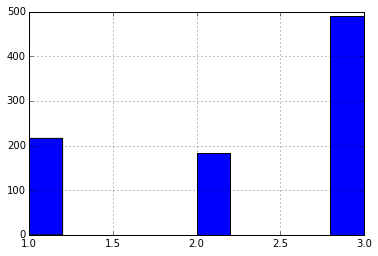

In [22]:
df_train['Pclass'].hist()

In [23]:
pt = df_train.pivot_table(values='PassengerId', 
                          index=['Sex', 'Pclass'], 
                          columns='Survived', 
                          aggfunc=lambda x: len(x))
pt

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [24]:
pt.apply(lambda x: x/x.sum(), axis=1)

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

In [25]:
pt.apply(lambda x: x/x.sum(), axis=1) > 0.5

Survived           0      1
Sex    Pclass              
female 1       False   True
       2       False   True
       3       False  False
male   1        True  False
       2        True  False
       3        True  False

「さらにFareも加えたらどうだろう？」

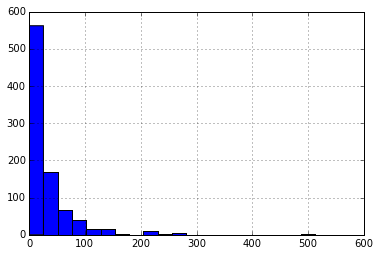

In [26]:
df_train['Fare'].hist(bins=20)

「ふむふむ、Fareは連続地なのか。それなら離散化して使ったらどうだろう？」

- [0, 10), [10, 20), [20, 30), [30, Inf)

In [27]:
df_train['FareCateg'] = "0: <10"
df_train.loc[df_train['Fare'].values >= 10, 'FareCateg'] = "1: 10<20"
df_train.loc[df_train['Fare'].values >= 20, 'FareCateg'] = "2: 20<30"
df_train.loc[df_train['Fare'].values >= 30, 'FareCateg'] = "3: 30+"

In [28]:
pt = df_train.pivot_table(values='PassengerId', index=['Sex', 'Pclass', 'FareCateg'], columns='Survived', aggfunc=lambda x: len(x))
pt

Survived                   0   1
Sex    Pclass FareCateg         
female 1      2: 20<30     1   5
              3: 30+       2  86
       2      1: 10<20     3  32
              2: 20<30     3  27
              3: 30+     NaN  11
       3      0: <10      26  38
              1: 10<20    18  25
              2: 20<30    14   7
              3: 30+      14   2
male   1      0: <10       6 NaN
              2: 20<30    18  12
              3: 30+      53  33
       2      0: <10       6 NaN
              1: 10<20    53  10
              2: 20<30    21   4
              3: 30+      11   3
       3      0: <10     231  29
              1: 10<20    29   9
              2: 20<30    21   3
              3: 30+      19   6

In [29]:
pt2 = pt.apply(lambda x: x/x.sum(), axis=1)
pt2 > 0.5

Survived                     0      1
Sex    Pclass FareCateg              
female 1      2: 20<30   False   True
              3: 30+     False   True
       2      1: 10<20   False   True
              2: 20<30   False   True
              3: 30+     False   True
       3      0: <10     False   True
              1: 10<20   False   True
              2: 20<30    True  False
              3: 30+      True  False
male   1      0: <10      True  False
              2: 20<30    True  False
              3: 30+      True  False
       2      0: <10      True  False
              1: 10<20    True  False
              2: 20<30    True  False
              3: 30+      True  False
       3      0: <10      True  False
              1: 10<20    True  False
              2: 20<30    True  False
              3: 30+      True  False

「同じ客室のクラスでも人によって払ってる金額だいぶ違うみたい」

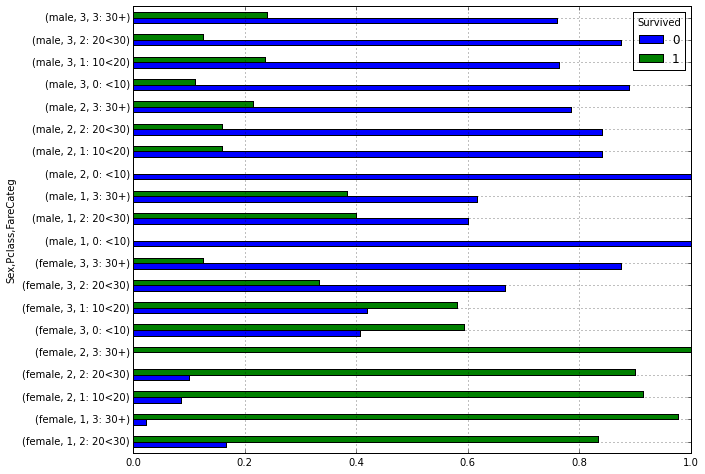

In [30]:
pt2.plot(kind="barh", figsize=(10, 8))

In [31]:
pt.apply(lambda x: x/x.sum(), axis=1) > 0.5

Survived                     0      1
Sex    Pclass FareCateg              
female 1      2: 20<30   False   True
              3: 30+     False   True
       2      1: 10<20   False   True
              2: 20<30   False   True
              3: 30+     False   True
       3      0: <10     False   True
              1: 10<20   False   True
              2: 20<30    True  False
              3: 30+      True  False
male   1      0: <10      True  False
              2: 20<30    True  False
              3: 30+      True  False
       2      0: <10      True  False
              1: 10<20    True  False
              2: 20<30    True  False
              3: 30+      True  False
       3      0: <10      True  False
              1: 10<20    True  False
              2: 20<30    True  False
              3: 30+      True  False

In [32]:
df_test['Survived'] = 0
df_test.loc[(df_test['Sex'] == "female") & (df_test['Pclass'] <= 2), 'Survived'] = 1
df_test.loc[(df_test['Sex'] == "female") & (df_test['Pclass'] == 3) & (df_test['Fare'] < 20), 'Survived'] = 1

In [33]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [34]:
df_test[['PassengerId', 'Survived']].to_csv("submission02.csv", index=False)

In [35]:
#!open .

<img src="leaderboradModel02.png", width=500>

# モデル３：おし！機械学習してみよう

- もう一度、データを読み出すところからやってみよう

In [36]:
# データの読み込み
df_train = pd.read_csv("./data/train.csv", header=0) # トレーニングデータ
df_test = pd.read_csv("./data/test.csv", header=0) # テストデータ

In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## 欠損値の処理

- trainとtestを合わせて欠損値の処理を行うと吉

In [38]:
iv = df_train.columns.tolist()

In [39]:
iv

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [40]:
iv.remove('Survived')
iv

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [41]:
# trainの従属変数を取り出す
y_train = df_train[['Survived']].as_matrix().astype(np.float).flatten()

In [42]:
y_train

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [43]:
# trainとtestの独立変数を結合
df = pd.concat([df_train[iv], df_test[iv]])

In [44]:
# indexを振りなおす
df.index = np.arange(df.shape[0])

In [45]:
# 欠損値と型をチェック
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


「Age, Fare, Cabin, Embarkedに欠損値ありだな」

### Ageの欠損値をどうにかする

In [46]:
# AgeIsNullという変数を追加
df['AgeIsNull'] = df['Age'].isnull().astype(int)
df['AgeIsNull'].sum()

263

In [47]:
# AgeFillという変数を追加
df['AgeFill'] = df['Age']

In [48]:
# 次のステップのため、Sexという変数（'female', 'male'）を元にして、Gender（0, 1）という変数を作る
# female = 0, male = 1
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [49]:
median_ages = np.zeros((2, 3))
for i in range(0, 2): # Gender
    for j in range(0, 3): # Pclass
        _k = (df['Gender'] == i) & (df['Pclass'] == j+1)
        median_ages[i, j] = df[_k]['Age'].dropna().median()
        df.loc[(df['Age'].isnull()) & _k, 'AgeFill'] = median_ages[i, j]

In [50]:
# それぞれのグループにおける年齢の中央値
median_ages

array([[ 36. ,  28. ,  22. ],
       [ 42. ,  29.5,  25. ]])

In [51]:
# AgeとAgeFillに含まれるNaNの数を数える
print df['Age'].isnull().sum()
print df['AgeFill'].isnull().sum()

263
0


### Fareの欠損値をどうにかする

In [52]:
# FareIsNullという変数を追加
df['FareIsNull'] = df['Fare'].isnull().astype(int)
df['FareIsNull'].sum()

1

In [53]:
# FareFillという変数を追加
df['FareFill'] = df['Fare']

In [54]:
# 中央値を代入
median_fare = df['Fare'].dropna().median()
print median_fare
df.loc[df['FareIsNull'] == 1, 'FareFill'] = median_fare

14.4542


### Cabinの欠損値をどうにかする

In [55]:
df['Cabin'].isnull().sum()

1014

In [56]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

「欠損値多いな！よしCabinは使わないことにしよう。」

### Embarkedの欠損値をどうにかする

In [57]:
df['Embarked'].isnull().sum()

2

In [58]:
df['EmbarkedIsNull'] = df['Embarked'].isnull().astype(int)

In [59]:
df['EmbarkedFill'] = df['Embarked']

In [60]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
dtype: int64

In [61]:
# 頻度が最も高い乗船港で欠損値を埋めよう
df.loc[df['Embarked'].isnull(), 'EmbarkedFill'] = df['Embarked'].value_counts().index[0]

In [62]:
# 欠損値の数
print df['Embarked'].isnull().sum()
print df['EmbarkedFill'].isnull().sum()

2
0


### Age, Fare, Cabin, Embarkedの欠損値をなんとか埋めたぞ！

## カテゴリー変数（Embarked）をなんとかしよう

- sklearn.preprocessing.LabelBinarizerを使うと吉
- Embarked: 乗船港（**Q**ueenstown, **C**herbourg, **S**outhampton）

In [63]:
df['EmbarkedFill'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [64]:
# LabelBinarizerの初期化
lb = preprocessing.LabelBinarizer()

In [65]:
# LabelBinarizerのフィッティング
lb.fit(df['EmbarkedFill'].values)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [66]:
lb.classes_

array(['C', 'Q', 'S'], 
      dtype='|S1')

In [67]:
# Embarkedを1-of-K codingにする
df_embarked = pd.DataFrame(lb.transform(df['EmbarkedFill']), columns=['Embarked_' + s for s in lb.classes_])

In [68]:
# df_embarkedをdfに追加
df = pd.concat([df, df_embarked], axis=1)

In [69]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeIsNull,AgeFill,Gender,FareIsNull,FareFill,EmbarkedIsNull,EmbarkedFill,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,...,0,22,1,0,7.2500,0,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,...,0,38,0,0,71.2833,0,C,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,...,0,26,0,0,7.9250,0,S,0,0,1


In [70]:
pd.set_option('display.max_columns', None) # 全ての行を強制的に表示

In [71]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNull,AgeFill,Gender,FareIsNull,FareFill,EmbarkedIsNull,EmbarkedFill,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,22,1,0,7.2500,0,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38,0,0,71.2833,0,C,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26,0,0,7.9250,0,S,0,0,1


## 新しく特徴量を作る

- 「兄弟・配偶者の数（SibSp ）」と「両親・子供の数（Parch）」を足すと「家族のサイズ（FamilySize）」が計算できる

In [72]:
df['FamilySize'] = df['SibSp'] + df['Parch']

- 年齢とクラスの等級のクロスターム（交互作用）も重要そう

In [73]:
df['Age*Class'] = df['AgeFill'] * df['Pclass']

## 機械学習ライブラリ(scikit-learn)用のデータ形式に変換

- scikit-learnに渡すため、pandasのデータフレーム（pd.DataFrame）からnumpy array（np.array）に変換する。

In [74]:
df_all = df.copy()

In [75]:
df_pid = df_all[['PassengerId']]

In [76]:
# いらない変数を落とす
df_all.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeIsNull', 'FareIsNull', 'EmbarkedIsNull', 'EmbarkedFill'], axis=1, inplace=True)

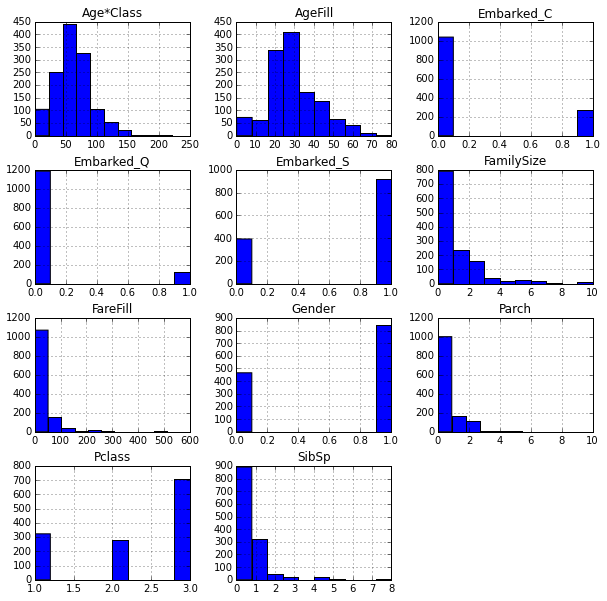

In [77]:
df_all.hist(figsize=(10, 10));

In [78]:
X_all = df_all.as_matrix().astype(np.float)

In [79]:
X_all.shape

(1309, 11)

## データの正規化

In [80]:
# 散らばりが大きいデータ（ここでは標準偏差>2.0を散らばりが大きいとした）を正規化してみよう。
large_std = X_all.std(axis=0) > 2.0

In [81]:
X_all[:, large_std]

array([[  22.    ,    7.25  ,   66.    ],
       [  38.    ,   71.2833,   38.    ],
       [  26.    ,    7.925 ,   78.    ],
       ..., 
       [  38.5   ,    7.25  ,  115.5   ],
       [  25.    ,    8.05  ,   75.    ],
       [  25.    ,   22.3583,   75.    ]])

In [82]:
X_all[:, large_std] = preprocessing.scale(X_all[:, large_std])

In [83]:
# 全ての変数に対して標準偏差を計算。３つの変数の標準偏差が正規化により１になっていることがわかる。
X_all.std(axis=0)

array([ 0.83751593,  1.04126043,  0.86522959,  1.        ,  0.47881429,
        1.        ,  0.40462248,  0.29177982,  0.45835752,  1.58303407,  1.        ])

In [84]:
# トレーニングデータの数
n_train = y_train.shape[0]

In [85]:
# トレーニングデータとテストデータに分割
X_train = X_all[:n_train, :]
X_test = X_all[n_train:, :]

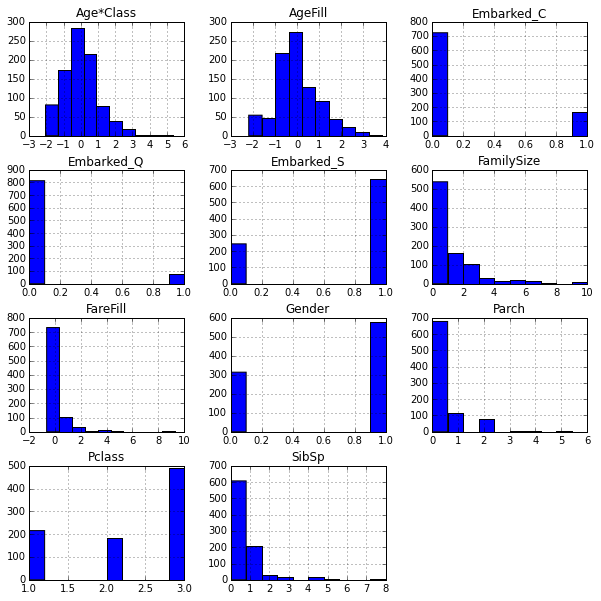

In [86]:
# Age*Class, AgeFill, FareFillのスケールが変わっている（標準偏差 = 1.0）
pd.DataFrame(X_train, columns=df_all.columns).hist(figsize=(10, 10));

In [87]:
X_train.shape

(891, 11)

In [88]:
y_train.shape

(891,)

## やっとこ機械学習できる！

- Pythonで機械学習をする場合はscikit-learnが基本
- http://scikit-learn.org/stable/

## 参考資料

- [YouTube: Bugra Akyildiz - A Thorough Machine Learning Pipeline via Scikit Learn](https://www.youtube.com/watch?v=1J7-p3ueQk0)
- [GitHub: Bugra Akyildiz's Pydata Dallas 2015 Scikit-Learn Tutorial](https://github.com/bugra/pydata-dal-2015)

In [89]:
# 機械学習のモデルを読み込む
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

# 機械学習のお役立ちモジュールを読み込む
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing

In [90]:
# 出力クラスの比を保ったままトレーニングデータを複数個（n_folds）のグループに分割し（stratified cross validation）、
# 各グループの従属変数を、そのグループ以外のデータを用いてトレーニングしたモデルで予測していく。
# この予測を全てつなぎ合わせたものが返り値。

def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [91]:
# 異なる判別モデルの性能評価（accuracy）

print('Passive Aggressive Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:  {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, svm.SVC))))
print('Random Forest Classifier:      {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, linear_model.LogisticRegression))))

Passive Aggressive Classifier: 0.600
Gradient Boosting Classifier:  0.829
Support vector machine(SVM):   0.822
Random Forest Classifier:      0.785
K Nearest Neighbor Classifier: 0.785
Logistic Regression:           0.807


In [92]:
# どんな入力に対しても0と答えるモデル
print('Dump Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, [0 for ii in y_train.tolist()])))

Dump Classifier: 0.616


In [93]:
pass_agg_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, linear_model.PassiveAggressiveClassifier))
grad_ens_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, ensemble.GradientBoostingClassifier))
decision_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, tree.DecisionTreeClassifier))
ridge_clf_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, linear_model.RidgeClassifier))
svm_svc_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, svm.SVC))
random_forest_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, ensemble.RandomForestClassifier))
k_neighbors_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, neighbors.KNeighborsClassifier))
logistic_reg_conf_matrix = metrics.confusion_matrix(y_train, stratified_cv(X_train, y_train, linear_model.LogisticRegression))
dumb_conf_matrix = metrics.confusion_matrix(y_train, [0 for ii in y_train.tolist()]); # ignore the warning as they are all 0

conf_matrix = {
                1: {
                    'matrix': pass_agg_conf_matrix,
                    'title': 'Passive Aggressive',
                   },
                2: {
                    'matrix': grad_ens_conf_matrix,
                    'title': 'Gradient Boosting',
                   },
                3: {
                    'matrix': decision_conf_matrix,
                    'title': 'Decision Tree',
                   },
                4: {
                    'matrix': ridge_clf_conf_matrix,
                    'title': 'Ridge',
                   },
                5: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machine',
                   },
                6: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                7: {
                    'matrix': k_neighbors_conf_matrix,
                    'title': 'K Nearest Neighbors',
                   },
                8: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                9: {
                    'matrix': dumb_conf_matrix,
                    'title': 'Dumb',
                   },
}

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

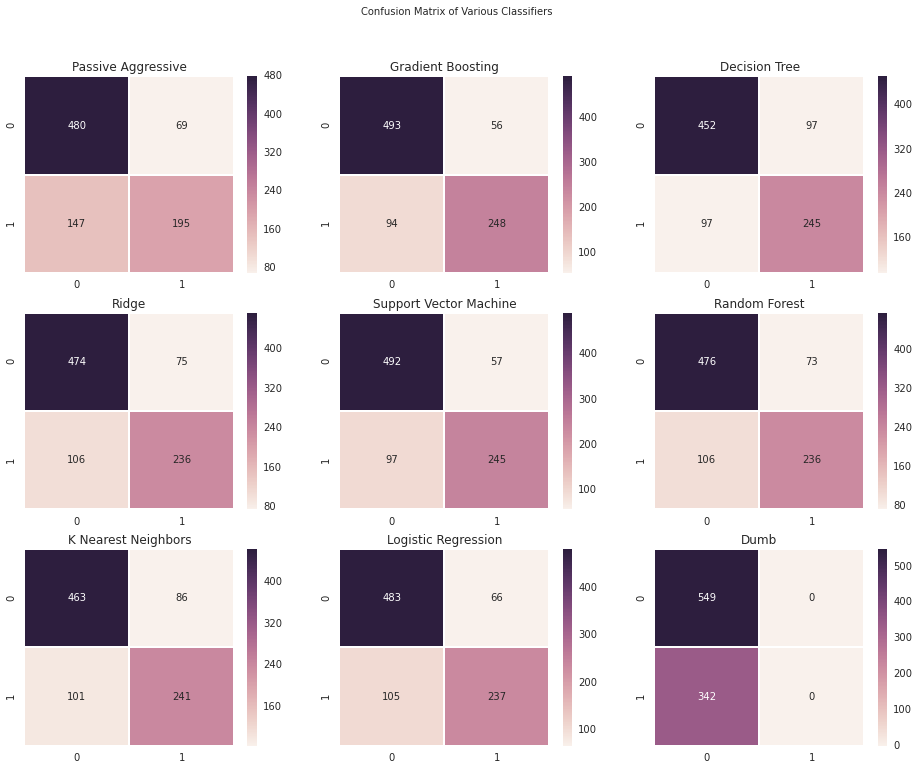

In [95]:
# matplotlibだと各セルの上に数字を表示するのが難しいので、
# ここではseabornで混同行列（Confusion Matrix）を描画。

fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

### 分類器の性能評価（Accuracy vs. Precision vs. Recall vs. F1 Score）


$$ accuracy = \frac{\mbox{true positives + true negatives}}{\mbox{true positives + true negatives + false positives + false negatives}} $$

$$ precision = \frac{\mbox{true positives}}{\mbox{true positives + false positives}} $$

$$ recall = \frac{\mbox{true positives}}{\mbox{true positives + false negatives}} $$

従属変数のクラスバランスが悪い場合は$f_1$スコアを使うと吉。なぜならprecisionとrecallの調和平均となっているから。

$$ f_1 = 2 \cdot \frac{pr \cdot rc}{pr + rc} $$

In [96]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_train, stratified_cv(X_train, y_train, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y_train, [0 for ii in y_train.tolist()]))); # ignore the warning as they are all 0

Passive Aggressive Classifier:
              precision    recall  f1-score   support

        0.0       0.76      0.80      0.78       549
        1.0       0.64      0.59      0.61       342

avg / total       0.71      0.72      0.71       891


Gradient Boosting Classifier:
              precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       549
        1.0       0.80      0.71      0.75       342

avg / total       0.82      0.82      0.82       891


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       549
        1.0       0.80      0.72      0.76       342

avg / total       0.82      0.82      0.82       891


Random Forest Classifier:
              precision    recall  f1-score   support

        0.0       0.82      0.87      0.85       549
        1.0       0.77      0.70      0.73       342

avg / total       0.80      0.81      0.80       891


K Nearest Neighb

/Users/otsuka/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

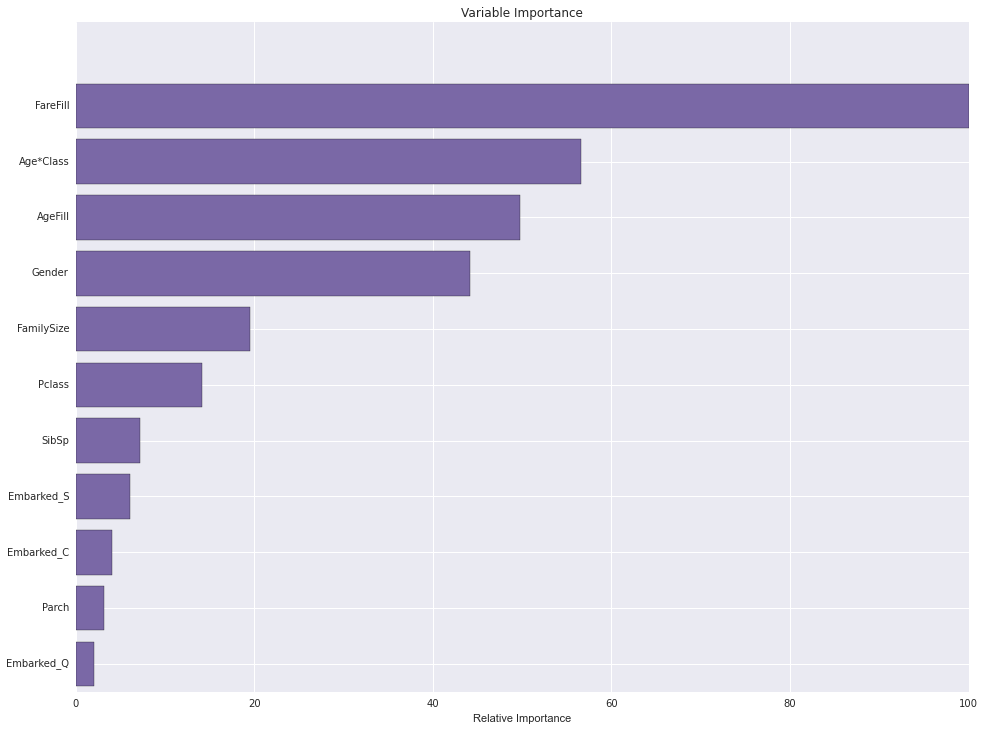

In [98]:
# 各特徴量の重要度を計算
feature_importance = gbc.feature_importances_
# 重要度を正規化
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df_all.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [99]:
y_pred = gbc.predict(X_test)

In [100]:
df_test['Survived'] = y_pred.astype(int)

In [101]:
df_test[['PassengerId', 'Survived']].to_csv("submission03.csv", index=False)

In [102]:
#!open .

<img src="./leaderboardModel03bgc.png", width=500>

# 学んだこと

1. シンプルなモデルが悪くて、複雑なモデルが良いというわけではない。
2. 今、見えているのはpublic leaderboardのスコアであり、最終的な順位の指標となるprivate leaderboardのスコアではない。
3. このデータセットはサイズが小さいので予測が一つ違うとスコアが大きく変わる。Titanic Datasetはあくまで練習用。

# スコアの意味

- 0.79-0.81: 良いスコア
- 0.81-0.82: かなり良いスコア
- 0.85-1.00: 不正スコア（無視すべし）

[What Accuracy Should I Be Aiming For?](https://www.kaggle.com/c/titanic/forums/t/4894/what-accuracy-should-i-be-aiming-for)

# 参考資料

PyData.Tokyoの資料がクオリティ高いんで後で見てね
- [PyData.Tokyo Tutorial & Hackathon #1](http://pydatatokyo.connpass.com/event/11860/)
    - [イントロダクション by シバタアキラさん](http://www.slideshare.net/hijiki_s/20150307-py-datatutorial)
    - [チュートリアル第一部「Data Handling」by 池内 孝啓さん](https://pydata.tokyo/ipynb/tutorial-1/dh.html)
    - [チュートリアル第二部「Machine Learning」by 田中 秀樹さん](https://pydata.tokyo/ipynb/tutorial-1/ml.html)

# おまけ

- [seaborn pairplot example](https://www.kaggle.com/bensel1234/titanic/python-seaborn-pairplot-example)

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [104]:
train = pd.read_csv("./data/train.csv")

In [105]:
train.loc[np.isnan(train["Age"]), "Age"] = np.median(train["Age"])

In [106]:
train.loc[train["Survived"]==1, "Survived"] = "Survived"
train.loc[train["Survived"]==0, "Survived"] = "Died"

In [107]:
train["ParentsAndChildren"] = train["Parch"]
train["SiblingsAndSpouses"] = train["SibSp"]

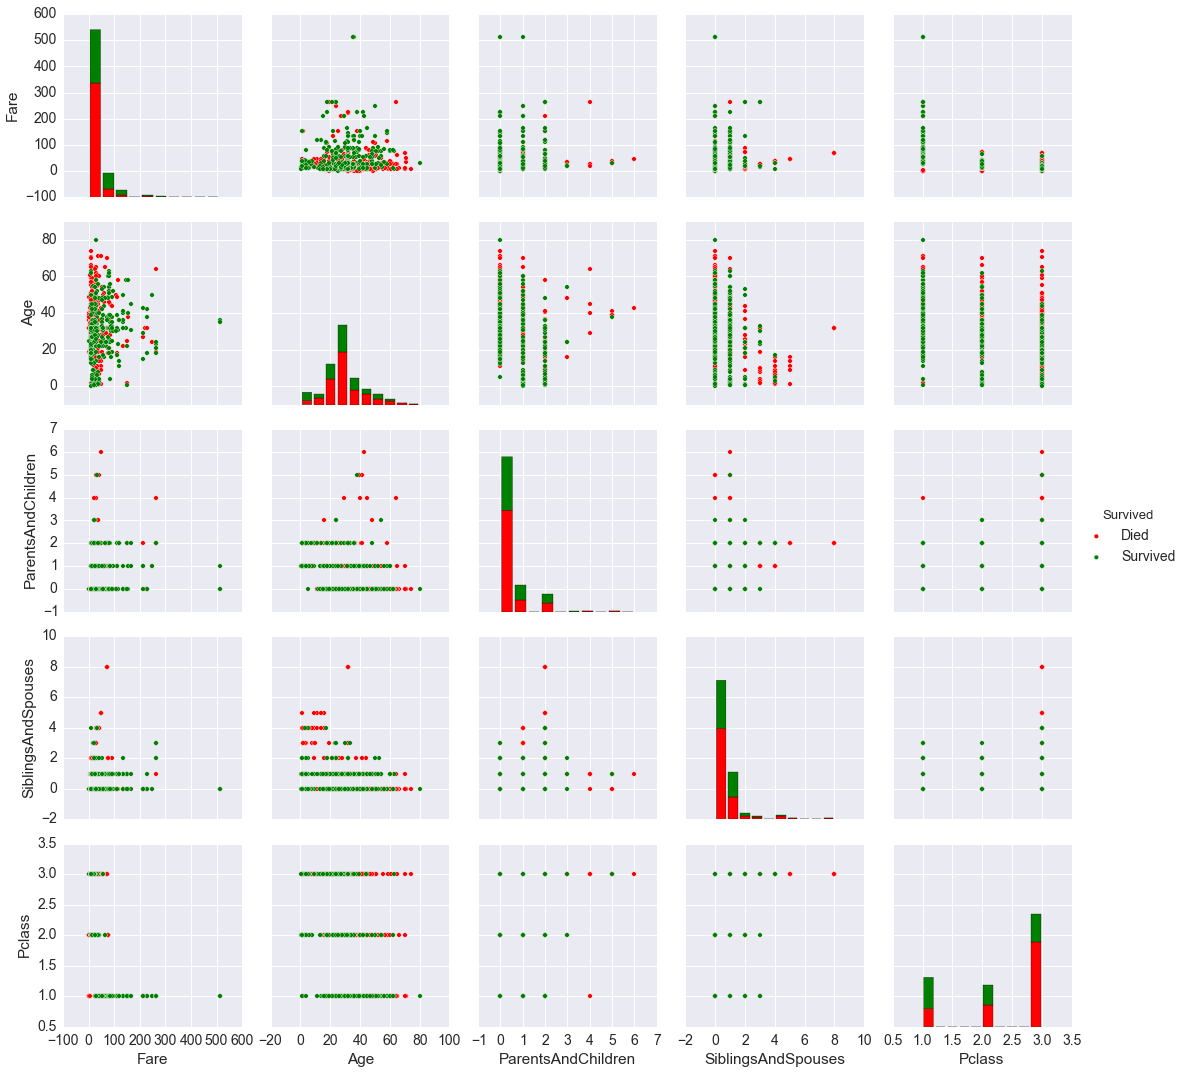

In [108]:
plt.figure()
sns.set_context("notebook", font_scale=1.4)
sns.pairplot(data=train[["Fare", "Survived", "Age", "ParentsAndChildren", "SiblingsAndSpouses", "Pclass"]],
            hue="Survived", dropna=True, palette=['r', 'g'])

plt.savefig("1_seaborn_pair_plot.png")

In [ ]:
# !open .